## 0.1. Preprocessed Data Initial Exploration

This notebook provides a brief exploration of the raw dataset obtained from `youtube_trends/dataset.py` and saved in `data/raw/dataset.csv`. This initial exploration was performed to determine the techniques and tools to use during data processing for future analysis. The data processing stage can also be found in `youtube_trends/dataset.py`.

---
#### About Raw Dataset

The raw dataset contains information about trending YouTube videos, including details about the videos and their respective channels.

**Video Information**
- `video_id`: Unique identifier for the video on YouTube.
- `video_published_at`: The date and time when the video was published.
- `video_trending_date`: The date when the video was identified as trending.
- `video_trending_country`: The country where the video is trending (ISO 3166-1 alpha-2 country code, e.g., "US" for the United States).
- `video_title`: The title of the video as displayed on YouTube.
- `video_description`: The description provided by the video creator.
- `video_default_thumbnail`: URL of the default thumbnail for the video.
- `video_category_id`: Numeric ID representing the category of the video (e.g., Music, Gaming, etc.).
- `video_tags`: List of tags associated with the video for categorization and discoverability.
- `video_duration`: Duration of the video in ISO 8601 format (e.g., "PT10M15S" for 10 minutes and 15 seconds).
- `video_dimension`: Dimension of the video (e.g., "2d", "3d").
- `video_definition`: Video resolution quality (e.g., "hd" for high definition, "sd" for standard definition).
- `video_licensed_content`: Boolean indicating if the video contains licensed content.
- `video_view_count`: Total number of views for the video.
- `video_like_count`: Total number of likes for the video.
- `video_comment_count`: Total number of comments on the video.

**Channel Information**
- `channel_id`: Unique identifier for the YouTube channel.
- `channel_title`: The name/title of the channel.
- `channel_description`: Description provided by the channel owner.
- `channel_custom_url`: Custom URL for the channel (if available).
- `channel_published_at`: The date and time when the channel was created.
- `channel_country`: The country associated with the channel (if specified by the creator).
- `channel_view_count`: Total number of views across all videos on the channel.
- `channel_subscriber_count`: Total number of subscribers to the channel.
- `channel_have_hidden_subscribers`: Boolean indicating if the channel has hidden its subscriber count.
- `channel_video_count`: Total number of videos uploaded by the channel.
- `channel_localized_title`: The localized title of the channel (if available in a different language).
- `channel_localized_description`: The localized description of the channel (if available in a different language).

---

In [34]:
import torch
import warnings
import requests
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
from io import BytesIO
from pathlib import Path
import plotly.express as px
import matplotlib.pyplot as plt
from IPython.display import HTML
import plotly.graph_objects as go
from IPython.display import display
from youtube_trends.config import RAW_DATA_DIR

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(RAW_DATA_DIR / "dataset.csv", low_memory=False)

In [3]:
display(df)

,video_id,video_published_at,video_trending__date,video_trending_country,channel_id,video_title,video_description,video_default_thumbnail,video_category_id,video_tags,...,channel_description,channel_custom_url,channel_published_at,channel_country,channel_view_count,channel_subscriber_count,channel_have_hidden_subscribers,channel_video_count,channel_localized_title,channel_localized_description
0,bB3-CUMERIU,2024-10-11T00:00:06Z,2024.10.12,United Arab Emirates,UCNYi_zGmR519r5gYdOKLTjQ,JENNIE - Mantra (Official Music Video),Official music video for “Mantra” by JENNIE ou...,https://i.ytimg.com/vi/bB3-CUMERIU/default.jpg,Music,"JENNIE,Mantra,제니,Jennie Mantra,Jennie from Bla...",...,NaN,@jennierubyjane,2021-01-13T06:19:55.86689Z,NaN,4.646152e+08,11600000.0,False,43.0,JENNIE,NaN
1,5ObJt_71AYc,2024-10-11T02:59:21Z,2024.10.12,United Arab Emirates,UCzU8-lZlRfkV3nj0RzAZdrQ,CHILE vs. BRASIL [1-2] | RESUMEN | ELIMINATORI...,#Chile #Brasil #eliminatoriassudamericanas #Cr...,https://i.ytimg.com/vi/5ObJt_71AYc/default.jpg,Sports,"fútbol,pelota,gol,copa,libertadores,sudamerica...",...,Canal Oficial de la Confederación Sudamericana...,@conmebol,2014-02-19T20:24:31Z,NaN,3.990467e+08,1610000.0,False,4637.0,CONMEBOL,Canal Oficial de la Confederación Sudamericana...
2,zfb0whgBBA8,2024-10-11T11:07:25Z,2024.10.12,United Arab Emirates,UCgGYPnVJytkr6sVNLQ-l0zQ,تحدي الحقيبة مع ابو عبير 🔥 | سلسلتنا #2,"1,375,547 مشترك❤️\n\nـــــــــــــــــــــــــ...",https://i.ytimg.com/vi/zfb0whgBBA8/default.jpg,Gaming,"تشكيله,فيفا,فيفا20,التمت,درافت,زلاتان,ام,جي,مل...",...,صانع محتوى وانزل مقاطع بشكل غير منظم 🌚,@mrlle99,2012-08-01T16:24:26Z,Saudi Arabia,1.143311e+08,1380000.0,False,314.0,LLE عبدالاله,صانع محتوى وانزل مقاطع بشكل غير منظم 🌚
3,SJfoPdeOPCQ,2024-10-11T00:10:10Z,2024.10.12,United Arab Emirates,UCzU8-lZlRfkV3nj0RzAZdrQ,VENEZUELA vs. ARGENTINA [1-1] | RESUMEN | ELIM...,#Venezuela #Argentina #eliminatoriassudamerica...,https://i.ytimg.com/vi/SJfoPdeOPCQ/default.jpg,Sports,"fútbol,pelota,gol,copa,libertadores,sudamerica...",...,Canal Oficial de la Confederación Sudamericana...,@conmebol,2014-02-19T20:24:31Z,NaN,3.990467e+08,1610000.0,False,4637.0,CONMEBOL,Canal Oficial de la Confederación Sudamericana...
4,UVb6QOKy0bI,2024-10-09T12:30:27Z,2024.10.12,United Arab Emirates,UCOzubmwpVZI7gD0Jf7Bk3Aw,Bougainvillea Trailer | October 17 | Jyothirma...,Presenting The Official Trailer of Bougainvill...,https://i.ytimg.com/vi/UVb6QOKy0bI/default.jpg,Film & Animation,NaN,...,Official YouTube Channel Of Amal Neerad Produc...,@amalneeradproductions5264,2017-05-31T14:31:01Z,NaN,1.999152e+07,40600.0,False,56.0,Amal Neerad Productions,Official YouTube Channel Of Amal Neerad Produc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2814623,3XyDEMolFAU,2025-04-21T16:00:06Z,2025.04.27,Papua New Guinea,UCXq2nALoSbxLMehAvYTxt_A,Why would Peeps™ do this?,David is back!!! HE HATH RISEN!\n\nGet the big...,https://i.ytimg.com/vi/3XyDEMolFAU/default.jpg,Comedy,"game grumps,Game Grumps,The Grumps,the grumps,...",...,Welcome friends and lovelies to a live action ...,@thegrumps,2019-05-23T23:51:29Z,United States,2.386165e+08,1190000.0,False,250.0,The Grumps,Welcome friends and lovelies to a live action ...
2814624,pTfN28TR-SY,2025-04-19T18:15:05Z,2025.04.27,Papua New Guinea,UCh5mLn90vUaB1PbRRx_AiaA,SIDEMEN AMONG US: JAILOR ROLE,🍗: Order food NOW at: https://www.eatsides.com...,https://i.ytimg.com/vi/pTfN28TR-SY/default.jpg,People & Blogs,"sidemen,moresidemen,miniminter,ksi,zerkaa,behz...",...,Welcome to the Official Sidemen 2nd Channel wh...,@moresidemen,2018-02-01T21:48:49Z,United Kingdom,5.254373e+09,9220000.0,False,1265.0,MoreSidemen,Welcome to the Official Sidemen 2nd Channel wh...
2814625,Ut2y8gAv3aY,2025-04-21T14:02:03Z,2025.04.27,Papua New Guinea,UC_ntXHv-XdKCD7CPynVvnQw,DRAGON BALL: Sparking! ZERO - DAIMA Character ...,Get ready for the next adventure in DRAGON BAL...,https://i.ytimg.com/vi/Ut2y8gAv3aY/default.jpg,Gaming,"Bandai Namco,Bandai

In [4]:
print(f"Shape of the dataset: {df.shape}\n")

Shape of the dataset: (2814628, 28)



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2814628 entries, 0 to 2814627
Data columns (total 28 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   video_id                         object 
 1   video_published_at               object 
 2   video_trending__date             object 
 3   video_trending_country           object 
 4   channel_id                       object 
 5   video_title                      object 
 6   video_description                object 
 7   video_default_thumbnail          object 
 8   video_category_id                object 
 9   video_tags                       object 
 10  video_duration                   object 
 11  video_dimension                  object 
 12  video_definition                 object 
 13  video_licensed_content           object 
 14  video_view_count                 float64
 15  video_like_count                 float64
 16  video_comment_count              float64
 17  channel_

#### Object columns

In [6]:
# Check for missing values
missing_values = df.select_dtypes(include=['object']).isnull().sum()
missing_percentage = 100 * missing_values / len(df)
missing_df = pd.DataFrame({
    'Column': df.select_dtypes(include=['object']).columns,
    'Missing Values': missing_values,
    'Missing Percentage': missing_percentage
})
missing_df = missing_df.reset_index(drop=True)
missing_df

,Column,Missing Values,Missing Percentage
0,video_id,11,0.000391
1,video_published_at,0,0.000000
2,video_trending__date,0,0.000000
3,video_trending_country,6,0.000213
4,channel_id,0,0.000000
5,video_title,0,0.000000
6,video_description,466751,16.583044
7,video_default_thumbnail,0,0.000000
8,video_category_id,1959,0.069601
9,video_tags,930609,33.063304


In [7]:
# Check for unique values in each object column
unique_values = df.select_dtypes(include=['object']).nunique()
unique_values_df = unique_values.reset_index()
unique_values_df.columns = ['Column', 'Unique Values']
unique_values_df

,Column,Unique Values
0,video_id,85704
1,video_published_at,82456
2,video_trending__date,198
3,video_trending_country,110
4,channel_id,21701
5,video_title,87545
6,video_description,68147
7,video_default_thumbnail,85719
8,video_category_id,17
9,video_tags,44358


The columns `video_dimension` and `channel_have_hidden_subscribers` have all non-null values equal to each other, so those columns are not gonna be consider for future analysis.

In [8]:
def histogram_unique(df, column):
    values = df[column].dropna()
    counts = values.value_counts(normalize=True) 
    
    fig = go.Figure(data=[go.Bar(
        x=counts.index,
        y=counts.values,
        marker_color='blue',
        opacity=0.6,
        text=[f'{p * 100:.2f}%' for p in counts.values], 
        textposition='outside',
    )])

    fig.update_layout(
        title=f'{column} Distribution',
        xaxis_title=column,
        yaxis_title='Proportion',
        template='plotly_white',
        xaxis=dict(tickmode='array', tickvals=counts.index),
        yaxis=dict(showgrid=True),
        showlegend=False
    )

    fig.show()

In [9]:
histogram_unique(df, 'video_definition')

In [10]:
histogram_unique(df, 'video_licensed_content')

The `video_definition` and `video_licensed_content` columns are highly unbalanced, to the point that we suspect that the `sd` and `false` classes in each column, respectively, do not contain enough information to be considered in the model.

In [11]:
histogram_unique(df, 'video_category_id')

**Note:** Due to the almost non-existent amount of videos with the categories `Nonprofits & Activism`, `CHK CHK (촉촉)` and `Better Voice`, it is not worth considering these categories when creating the model. Also, for simplicity during the analysis of the dataset, we will drop theh nan values of this column.

In [12]:
removed_categories = ['Nonprofits & Activism', 'CHK CHK (촉촉)', 'Better Voice']
df = df[~df['video_category_id'].isin(removed_categories)]
df = df.dropna(subset=['video_category_id'])

For thumbnails, we need to be able to see them if necessary and detect what type of object they contain. To do this, we'll consider the yolov5x model pre-trained on the COCO dataset.

In [13]:
def show_thumbnails(df, n_thumbnails=12):
    html = ""
    for url in df['video_default_thumbnail'].head(n_thumbnails):
        html += f'<img src="{url}" width="120" height="90" style="margin:5px">'
    display(HTML(html))

In [14]:
show_thumbnails(df)

In [15]:
def detect_thumbnails(df, n_thumbnails=6):
    model = torch.hub.load('ultralytics/yolov5', 'yolov5x') 
    for url in df['video_default_thumbnail'].head(n_thumbnails):
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        results = model(img)
        results.show()  
        results.print() 

Using cache found in C:\Users\eddel/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2025-4-28 Python-3.12.9 torch-2.7.0+cpu CPU

Fusing layers... 
YOLOv5x summary: 444 layers, 86705005 parameters, 0 gradients, 205.5 GFLOPs
Adding AutoShape... 


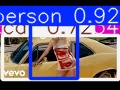

image 1/1: 90x120 1 person, 1 car, 1 stop sign
Speed: 13.8ms pre-process, 645.7ms inference, 9.0ms NMS per image at shape (1, 3, 480, 640)


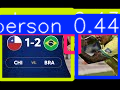

image 1/1: 90x120 1 person, 1 cell phone, 1 teddy bear
Speed: 3.0ms pre-process, 666.4ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)


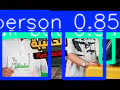

image 1/1: 90x120 2 persons, 1 baseball bat
Speed: 4.0ms pre-process, 703.3ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


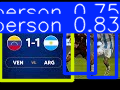

image 1/1: 90x120 3 persons, 1 cell phone
Speed: 2.1ms pre-process, 624.4ms inference, 4.0ms NMS per image at shape (1, 3, 480, 640)


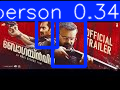

image 1/1: 90x120 2 persons
Speed: 3.6ms pre-process, 646.7ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)


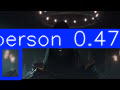

image 1/1: 90x120 1 person
Speed: 3.3ms pre-process, 605.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


In [16]:
detect_thumbnails(df)

#### Float columns

In [17]:
# Check for missing values
missing_values = df.select_dtypes(include=['float64']).isnull().sum()
missing_percentage = 100 * missing_values / len(df)
missing_df = pd.DataFrame({
    'Column': df.select_dtypes(include=['float64']).columns,
    'Missing Values': missing_values,
    'Missing Percentage': missing_percentage
})
missing_df = missing_df.reset_index(drop=True)
missing_df

,Column,Missing Values,Missing Percentage
0,video_view_count,656,0.023323
1,video_like_count,32836,1.167442
2,video_comment_count,18371,0.653157
3,channel_view_count,6957,0.247347
4,channel_subscriber_count,11,0.000391
5,channel_video_count,11,0.000391


In [18]:
df.describe()

,video_view_count,video_like_count,video_comment_count,channel_view_count,channel_subscriber_count,channel_video_count
count,2.811990e+06,2.779810e+06,2.794275e+06,2.805689e+06,2.812635e+06,2.812635e+06
mean,1.422339e+07,4.236330e+05,7.434782e+03,5.278068e+09,1.315378e+07,5.663809e+03
std,2.989997e+07,9.177830e+05,2.419676e+04,1.207511e+10,3.881616e+07,2.487812e+04
min,5.715000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.052250e+05,2.142700e+04,5.760000e+02,2.586627e+08,8.260000e+05,2.440000e+02
50%,2.410016e+06,7.861000e+04,1.727000e+03,1.166735e+09,3.250000e+06,7.540000e+02
75%,1.271694e+07,3.703810e+05,4.741000e+03,4.746093e+09,1.120000e+07,1.844000e+03
max,4.075230e+08,1.090424e+07,6.009910e+05,2.944427e+11,3.880000e+08,6.204610e+05


In [51]:
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

,video_view_count,video_like_count,video_comment_count,channel_view_count,channel_subscriber_count,channel_video_count,day_of_week,hour,month
video_view_count,1.000000,0.891152,0.240892,0.439120,0.478907,-0.054479,0.000221,-0.016972,0.024828
video_like_count,0.891152,1.000000,0.334380,0.500369,0.598541,-0.059520,-0.002096,0.003844,0.033110
video_comment_count,0.240892,0.334380,1.000000,0.172953,0.180033,-0.004322,0.028917,-0.113558,0.043740
channel_view_count,0.439120,0.500369,0.172953,1.000000,0.783090,0.079627,0.019503,-0.010191,-0.013429
channel_subscriber_count,0.478907,0.598541,0.180033,0.783090,1.000000,-0.007977,0.039899,0.056989,0.006160
channel_video_count,-0.054479,-0.059520,-0.004322,0.079627,-0.007977,1.000000,-0.004968,-0.026639,-0.031029
day_of_week,0.000221,-0.002096,0.028917,0.019503,0.039899,-0.004968,1.000000,-0.028205,0.032194
hour,-0.016972,0.003844,-0.113558,-0.010191,0.056989,-0.026639,-0.028205,1.000000,-0.009729
month,0.024828,0.033110,0.043740,-0.013429,0.006160,-0.031029,0.032194,-0.009729,1.000000


In [114]:
fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.loc[correlation_matrix.columns[::-1], correlation_matrix.columns].values, 
    x=correlation_matrix.columns,  
    y=correlation_matrix.columns[::-1],  
    colorscale='Blues',  
    colorbar=dict(title="Correlation"),  
    hoverongaps=True, 
    zmin=-1,  
    zmax=1,   
))

annotations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        annotations.append(
            dict(
                x=correlation_matrix.columns[i],  
                y=correlation_matrix.columns[j], 
                text=f"{correlation_matrix.loc[correlation_matrix.columns[j], correlation_matrix.columns[i]]:.2f}", 
                showarrow=False,
                font=dict(size=12, color="black"),
                align="center"
            )
        )

fig.update_layout(
    title="Correlation Matrix",
    xaxis=dict(title="Variables", tickangle=45), 
    yaxis=dict(title="Variables"),  
    height=900,  
    width=900,   
    annotations=annotations  
)

fig.show()

In [21]:
float_columns = df.select_dtypes(include=['float64']).columns
sns.pairplot(df[float_columns])
plt.show()

#### Time series

In [22]:
df['video_published_at'] = pd.to_datetime(df['video_published_at'], errors='coerce')
df['video_trending__date'] = pd.to_datetime(df['video_trending__date'], errors='coerce')

In [23]:
videos_per_day = df.groupby(df['video_published_at'].dt.date).size().reset_index(name='count')
videos_per_day['video_published_at'] = pd.to_datetime(videos_per_day['video_published_at'])

videos_per_day_rolling = videos_per_day['count'].rolling(window=7).mean()

fig = px.line(
    videos_per_day,
    x='video_published_at',
    y='count',
    markers=True,
    title='Number of videos uploaded per day',
    labels={'video_published_at': 'Date', 'count': 'Number of videos'}
)

fig.add_trace(
    go.Scatter(
        x=videos_per_day['video_published_at'],
        y=videos_per_day_rolling,
        mode='lines',
        name='Moving average (7 days)',
        line=dict(color='red'),
        opacity=1
    )
)

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Number of videos',
    template='plotly_white',
    showlegend=True
)

fig.show()

In [24]:
videos_per_category = df.groupby([df['video_category_id'], df['video_published_at'].dt.date]).size().reset_index(name='count')
videos_per_category['video_published_at'] = pd.to_datetime(videos_per_category['video_published_at'])

category_figures = []

for category in videos_per_category['video_category_id'].unique():
    category_data = videos_per_category[videos_per_category['video_category_id'] == category]
    category_rolling = category_data['count'].rolling(window=7).mean()

    fig = px.line(
        category_data,
        x='video_published_at',
        y='count',
        markers=True,
        title=f'Number of videos uploaded per day ({category})',
        labels={'video_published_at': 'Date', 'count': 'Number of videos'}
    )

    fig.add_trace(
        go.Scatter(
            x=category_data['video_published_at'],
            y=category_rolling,
            mode='lines',
            name='Moving average (7 days)',
            line=dict(color='red'),
            opacity=1
        )
    )

    fig.update_layout(
        xaxis_title='Date',
        yaxis_title='Number of videos',
        template='plotly_white',
        showlegend=True
    )

    category_figures.append(fig)

for fig in category_figures:
    fig.show()

In [25]:
df['day_of_week'] = df['video_published_at'].dt.dayofweek
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['day_name'] = df['day_of_week'].map(day_names)

videos_per_dayofweek = df['day_name'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

fig = go.Figure(data=[go.Bar(
    x=videos_per_dayofweek.index,
    y=videos_per_dayofweek.values,
    marker_color='blue',
    opacity=0.6
)])

fig.update_layout(
    title='Number of videos uploaded per day of the week',
    xaxis_title='Day of the week',
    yaxis_title='Number of videos',
    template='plotly_white',
    xaxis=dict(tickmode='array', tickvals=videos_per_dayofweek.index),
    yaxis=dict(showgrid=True),
    showlegend=False
)

fig.show()

In [26]:
category_figures_day = []

for category in df['video_category_id'].unique():
    if pd.isna(category):
        continue

    category_data = df[df['video_category_id'] == category]
    videos_per_dayofweek = category_data['day_name'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

    fig = go.Figure(data=[go.Bar(
        x=videos_per_dayofweek.index,
        y=videos_per_dayofweek.values,
        marker_color='blue',
        opacity=0.6
    )])

    fig.update_layout(
        title=f'Number of videos uploaded per day of the week ({category})',
        xaxis_title='Day of the week',
        yaxis_title='Number of videos',
        template='plotly_white',
        xaxis=dict(tickmode='array', tickvals=videos_per_dayofweek.index),
        yaxis=dict(showgrid=True),
        showlegend=False
    )

    category_figures_day.append(fig)

for fig in category_figures_day:
    fig.show()

In [27]:
df['hour'] = df['video_published_at'].dt.hour

heatmap_data = df.pivot_table(index='day_of_week', columns='hour', values='video_published_at', aggfunc='count', fill_value=0)

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data.index = [day_names[int(d)] for d in heatmap_data.index]

plt.figure(figsize=(20, 8))
sns.heatmap(heatmap_data, cmap='Blues', linewidths=0.6, linecolor='gray', annot=True, fmt='d')
plt.title('Number of videos published by day of the week and time')
plt.xlabel('Time of day')
plt.ylabel('Day of the week')
plt.tight_layout()
plt.show()

In [28]:
for category in df['video_category_id'].unique():
    if pd.isna(category):
        continue

    category_data = df[df['video_category_id'] == category]
    category_data['hour'] = category_data['video_published_at'].dt.hour
    category_data['day_of_week'] = category_data['video_published_at'].dt.dayofweek
    
    heatmap_data = category_data.pivot_table(index='day_of_week', columns='hour', values='video_published_at', aggfunc='count', fill_value=0)
    heatmap_data.index = [day_names[int(d)] for d in heatmap_data.index]

    plt.figure(figsize=(20, 8))
    sns.heatmap(heatmap_data, cmap='Blues', linewidths=0.6, linecolor='gray', annot=True, fmt='d')
    plt.title(f'Number of videos published by day of the week and time for category: {category}')
    plt.xlabel('Time of day')
    plt.ylabel('Day of the week')
    plt.tight_layout()
    plt.show()

In [29]:
df['month'] = df['video_published_at'].dt.month

month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
df['month_name'] = df['month'].map(month_names)

videos_per_month = df['month_name'].value_counts().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

fig = go.Figure(data=[go.Bar(
    x=videos_per_month.index,
    y=videos_per_month.values,
    marker_color='blue',  
    opacity=0.6           
)])

fig.update_layout(
    title='Number of videos uploaded per month',
    xaxis_title='Month',
    yaxis_title='Number of videos',
    template='plotly_white',
    xaxis=dict(tickmode='array', tickvals=videos_per_month.index),
    yaxis=dict(showgrid=True),
    showlegend=False
)

fig.show()

In [30]:
category_figures_month = []

for category in df['video_category_id'].unique():
    if pd.isna(category):
        continue

    category_data = df[df['video_category_id'] == category]
    videos_per_month = category_data['month_name'].value_counts().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

    fig = go.Figure(data=[go.Bar(
        x=videos_per_month.index,
        y=videos_per_month.values,
        marker_color='blue',  
        opacity=0.6           
    )])

    fig.update_layout(
        title=f'Number of videos uploaded per month ({category})',
        xaxis_title='Month',
        yaxis_title='Number of videos',
        template='plotly_white',
        xaxis=dict(tickmode='array', tickvals=videos_per_month.index),
        yaxis=dict(showgrid=True),
        showlegend=False
    )

    category_figures_month.append(fig)

for fig in category_figures_month:
    fig.show()

In [117]:
heatmap_data_month = df.pivot_table(index='month', columns='hour', values='video_published_at', aggfunc='count', fill_value=0)
heatmap_data_month.index = heatmap_data_month.index.map(month_names)

plt.figure(figsize=(20, 8))
sns.heatmap(heatmap_data_month, cmap='Blues', linewidths=0.6, linecolor='gray', annot=True, fmt='d')
plt.title('Number of videos published per month and hour')
plt.xlabel('Time of day')
plt.ylabel('Month')
plt.tight_layout()
plt.show()

In [118]:
category_figures_month = []

for category in df['video_category_id'].unique():
    if pd.isna(category):
        continue
    
    category_data = df[df['video_category_id'] == category]
    
    heatmap_data_month = category_data.pivot_table(index='month', columns='hour', values='video_published_at', aggfunc='count', fill_value=0)
    heatmap_data_month.index = heatmap_data_month.index.map(month_names)

    plt.figure(figsize=(20, 8))
    sns.heatmap(heatmap_data_month, cmap='Blues', linewidths=0.6, linecolor='gray', annot=True, fmt='d')
    plt.title(f'Number of videos published per month and hour ({category})')
    plt.xlabel('Time of day')
    plt.ylabel('Month')
    plt.tight_layout()
    plt.show()

**Note:** The dataframe contains data from September 2024 to the present, this explains why there is no record of some months.